In [1]:
# loand Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sys
import os

# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

from data_loader import get_file_path, get_cleaned_data, CSVData

In [2]:
# Load Benin data
benin_path = get_file_path("benin")
benin_data = CSVData(benin_path).load_data()

In [3]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# Copying the dataset
df = benin_data.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
# Missing values for each column
missing_values = df.isna().sum()
missing_values


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Summary statistics for all numeric columns
summary_stats = df.describe()
summary_stats

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [7]:
# Percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100

In [8]:
# Columns with more than 5% missing values
columns_above_5pt_missing = missing_percentage[missing_percentage > 5].index.tolist()

In [9]:
print("\n🚨 Columns with >5% Missing Values:")
for col in columns_above_5pt_missing:
    print(f"{col}: {missing_percentage[col]:.2f}% missing")


🚨 Columns with >5% Missing Values:
Comments: 100.00% missing


In [10]:
# Identify target columns
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check for missing 
missing_in_terget = df[target_cols].isna().sum()
missing_in_terget

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

### Indentify Outliers

In [11]:
# 2. Compute Z-scores and flag outliers (|Z| > 3)
z_scores = df[target_cols].apply(lambda x: zscore(x, nan_policy='omit'))

# Create a boolean mask for rows where any column has |Z| > 3
outlier_mask = (z_scores.abs() > 3)

In [17]:
# Count of outliers per column
#outliers = outlier_mask.sum()
#outliers

In [18]:
# Flag rows with any outliers
df['has_outlier'] = outlier_mask.any(axis=1)

# Impute missing values in target columns with the median
df[target_cols] = df[target_cols].apply(lambda col: col.fillna(col.median()))

# Drop rows that still have missing values (if any)
df_cleaned = df.dropna(subset=target_cols)

In [20]:
# Export cleaned data
country = "benin"  
output_path = f"data/{country}_clean.csv"
os.makedirs("data", exist_ok=True)
df_cleaned.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")

✅ Cleaned data saved to: data/benin_clean.csv


#### Visualize Outliers

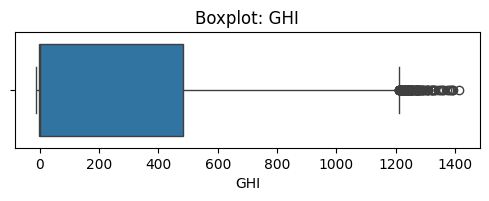

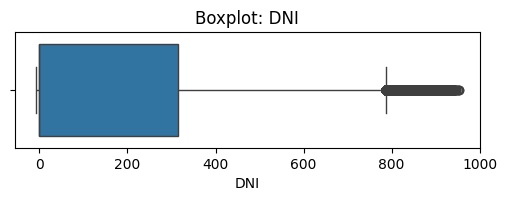

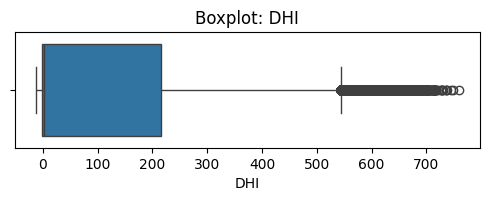

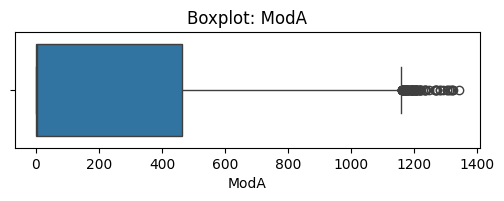

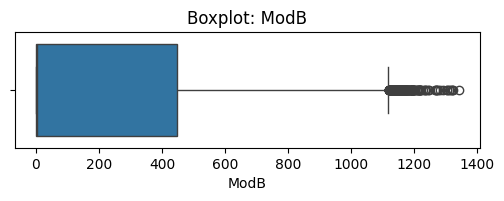

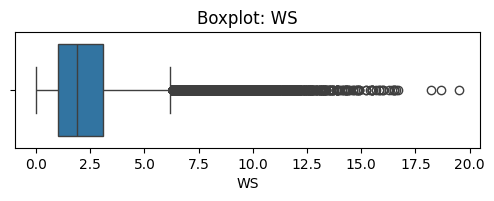

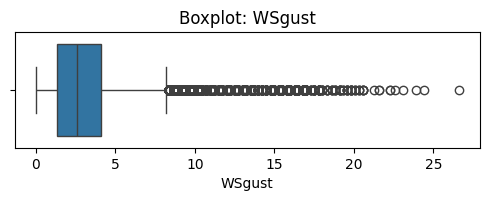

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for quick visual inspection
for col in target_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


###  Time Series Analysis

To visualize and analyze the temporal patterns of solar irradiance and ambient temperature (GHI, DNI, DHI, Tamb) over time

In [2]:
# Load Benin data
benin_data = get_cleaned_data("benin_cleaned")
df_cleaned = CSVData(benin_data).load_data()

In [3]:
# Convert Timestamp to datetime if not already
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Extract month and hour for analysis
df_cleaned['Month'] = df_cleaned['Timestamp'].dt.month
df_cleaned['Hour'] = df_cleaned['Timestamp'].dt.hour

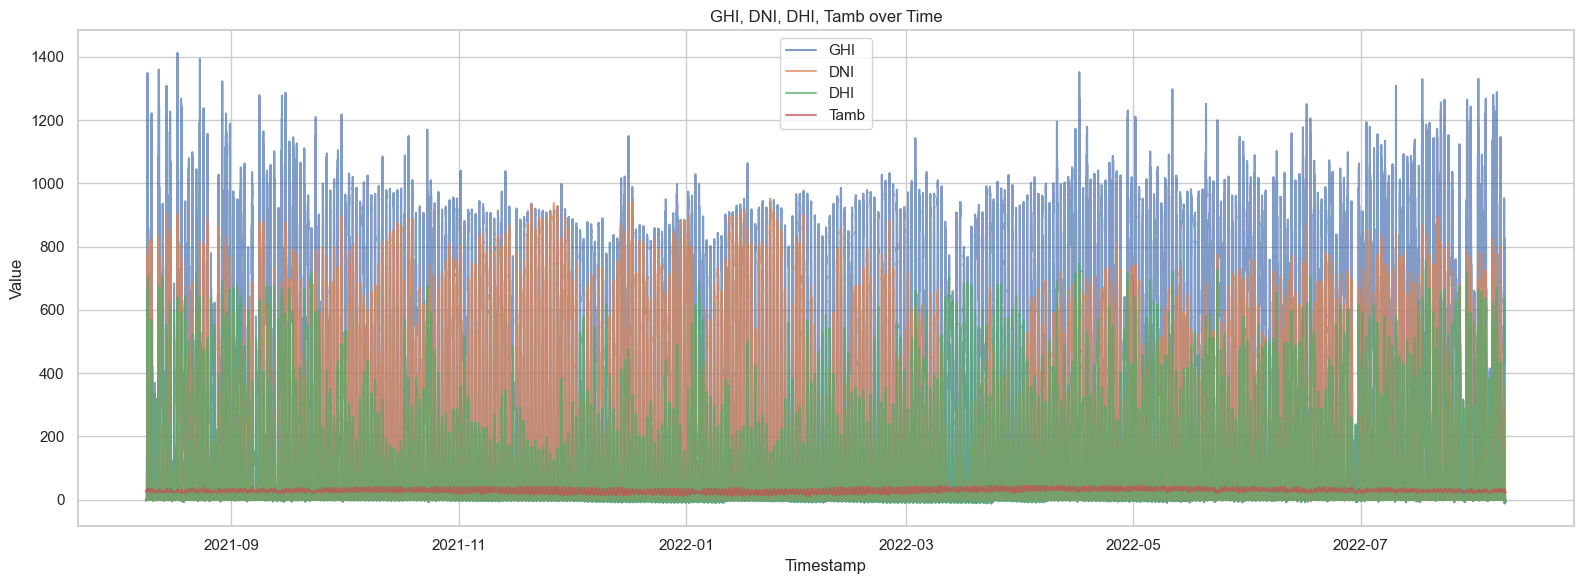

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Plot GHI, DNI, DHI, Tamb vs. Timestamp (line chart)
plt.figure(figsize=(16, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_cleaned['Timestamp'], df_cleaned[col], label=col, alpha=0.7)

plt.title('GHI, DNI, DHI, Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

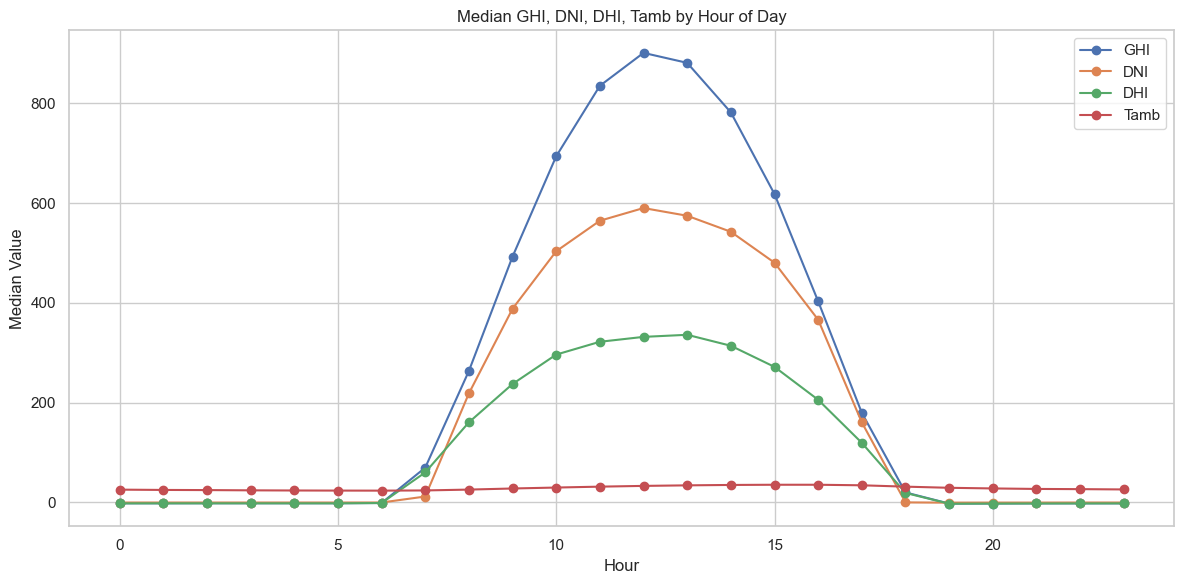

In [5]:
# Group by Hour and compute median
hourly_median = df_cleaned.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].median()

# Plot hourly trends
hourly_median.plot(figsize=(12, 6), marker='o')
plt.title('Median GHI, DNI, DHI, Tamb by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Median Value')
plt.grid(True)
plt.tight_layout()
plt.show()


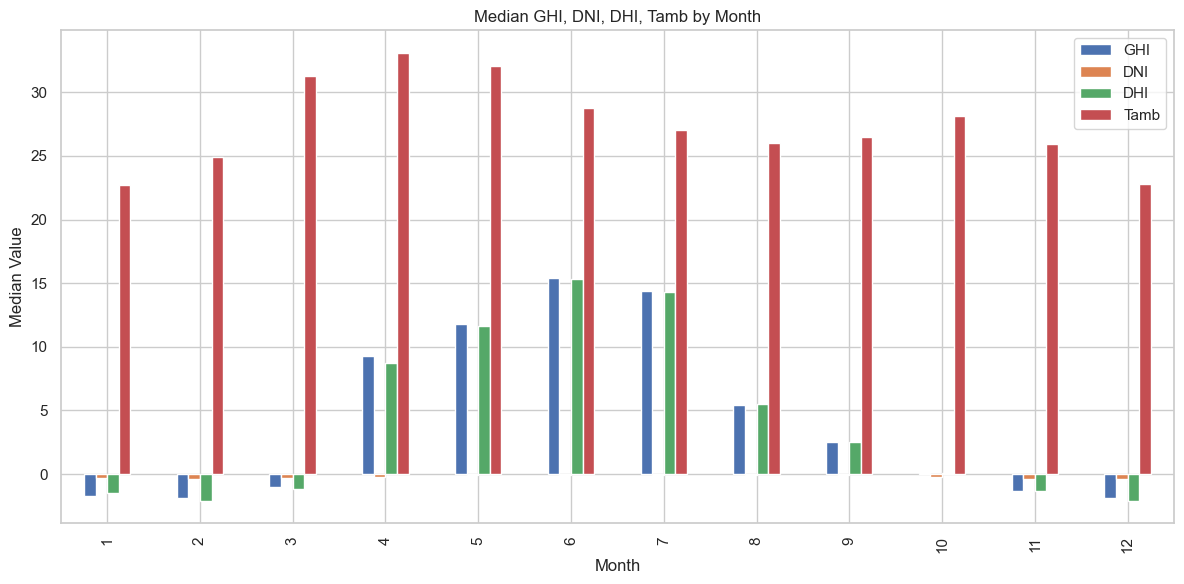

In [6]:
# Group by Month and compute median
monthly_median = df_cleaned.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].median()

# Plot monthly trends
monthly_median.plot(kind='bar', figsize=(12, 6))
plt.title('Median GHI, DNI, DHI, Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Median Value')
plt.tight_layout()
plt.show()
